# **Importing the Important Libraries**


In [106]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import plotly as plt
import plotly.express as px
import plotly.graph_objects as go


# **Importing the CSV Files**

In [107]:
df = pd.read_csv('/kaggle/input/acadimic-dataset/train.csv')
df_test  = pd.read_csv('/kaggle/input/acadimic-dataset/test.csv')
submission = pd.read_csv('/kaggle/input/sample-submission/sample_submission.csv')

In [108]:
# Gathering the initial information of the train.csv
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [109]:
# Checking the Null values in the train.csv
df.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [110]:
# Checking the Dimensions of the Dataset.
df.shape

(76518, 38)

In [111]:
# Checking the unique values in the columns of the Dataset.
df.nunique()


id                                                76518
Marital status                                        6
Application mode                                     22
Application order                                     8
Course                                               19
Daytime/evening attendance                            2
Previous qualification                               21
Previous qualification (grade)                      110
Nacionality                                          18
Mother's qualification                               35
Father's qualification                               39
Mother's occupation                                  40
Father's occupation                                  56
Admission grade                                     668
Displaced                                             2
Educational special needs                             2
Debtor                                                2
Tuition fees up to date                         

In [112]:
# Checking the Discription in the columns of the Dataset.

df.describe()


,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,...,76518.00000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000,76518.000000
mean,38258.500000,1.111934,16.054419,1.644410,9001.286377,0.915314,3.658760,132.378766,1.226600,19.837633,...,0.05796,0.137053,5.933414,7.234468,4.007201,9.626085,0.062443,11.520340,1.228218,-0.080921
std,22088.988286,0.441669,16.682337,1.229645,1803.438531,0.278416,8.623774,10.995328,3.392183,15.399456,...,0.40849,0.933830,1.627182,3.503040,2.772956,5.546035,0.462107,2.653375,1.398816,2.251382
min,0.000000,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,19129.250000,1.000000,1.000000,1.000000,9119.000000,1.000000,1.000000,125.000000,1.000000,1.000000,...,0.00000,0.000000,5.000000,6.000000,1.000000,10.000000,0.000000,9.400000,0.300000,-1.700000
50%,38258.500000,1.000000,17.000000,1.000000,9254.000000,1.000000,1.000000,133.100000,1.000000,19.000000,...,0.00000,0.000000,6.000000,7.000000,5.000000,12.142857,0.000000,11.100000,1.400000,0.320000
75%,57387.750000,1.000000,39.000000,2.000000,9670.000000,1.000000,1.000000,140.000000,1.000000,37.000000,...,0.00000,0.000000,6.000000,9.000000,6.000000,13.244048,0.000000,12.700000,2.600000,1.790000
max,76517.000000,6.000000,53.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,...,12.00000,19.000000,23.000000,33.000000,20.000000,18.000000,12.000000,16.200000,3.700000,3.510000


# **EDA**

In [113]:
# Assuming df is your DataFrame and it contains a column named 'Gender'
gender_counts = df['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Colors for the chart
colors = ['#FEBFB3', '#E1396C']

# Create the shadow effect by adding a larger, semi-transparent pie chart underneath
fig = go.Figure()

fig.add_trace(go.Pie(labels=gender_counts['Gender'], values=gender_counts['Count'], 
                     hoverinfo='label+percent', textinfo='percent', 
                     textfont_size=18, textfont=dict(color='white', family="Arial Black"),
                     marker=dict(colors=['rgba(0,0,0,0.2)', 'rgba(0,0,0,0.2)'],
                                 line=dict(color='#000000', width=2)),
                     hole=0.0))

# Create the main pie chart
fig.add_trace(go.Pie(labels=gender_counts['Gender'], values=gender_counts['Count'], 
                     hoverinfo='label+percent', textinfo='percent+label', 
                     textfont_size=18, textfont=dict(color='black', family="Arial Black"),
                     marker=dict(colors=colors, line=dict(color='#000000', width=2)),
                     hole=0.0))

# Update the layout to add a title and customize the appearance
fig.update_layout(
    title_text='Gender Distribution',
    annotations=[dict(text='Gender', x=0.5, y=0.5, font_size=20, showarrow=False)],
    showlegend=True,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Courier New, monospace", size=18, color="#7f7f7f")
)

# Add transition effects
fig.update_layout(
    transition=dict(duration=500, easing='cubic-in-out')
)

# Customize the hover mode and display
fig.update_layout(hovermode='closest')

# Show the figure
fig.show()


In [114]:
# Assuming df is your DataFrame and it contains a column named 'Target'
target_counts = df['Target'].value_counts().reset_index()
target_counts.columns = ['Target', 'Count']

# Define colors for the pie chart
colors = ['#FEBFB3', '#E1396C', '#96D38C']

# Create the shadow effect by adding a larger, semi-transparent pie chart underneath
fig = go.Figure()

fig.add_trace(go.Pie(labels=target_counts['Target'], values=target_counts['Count'], 
                     hoverinfo='label+percent', textinfo='percent', 
                     textfont_size=18, textfont=dict(color='white', family="Arial Black"),
                     marker=dict(colors=['rgba(0,0,0,0.2)', 'rgba(0,0,0,0.2)', 'rgba(0,0,0,0.2)'],
                                 line=dict(color='#000000', width=2)),
                     hole=0.0))

# Create the main pie chart
fig.add_trace(go.Pie(labels=target_counts['Target'], values=target_counts['Count'], 
                     hoverinfo='label+percent', textinfo='percent+label', 
                     textfont_size=18, textfont=dict(color='black', family="Arial Black"),
                     marker=dict(colors=colors, line=dict(color='#000000', width=2)),
                     hole=0.0))

# Update the layout to add a title and customize the appearance
fig.update_layout(
    title_text='Target Distribution',
    annotations=[dict(text='Target', x=0.5, y=0.5, font_size=20, showarrow=False)],
    showlegend=True,
    paper_bgcolor='rgba(0,0,0,0)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Courier New, monospace", size=18, color="#7f7f7f")
)

# Add transition effects
fig.update_layout(
    transition=dict(duration=500, easing='cubic-in-out')
)

# Customize the hover mode and display
fig.update_layout(hovermode='closest')

# Show the figure
fig.show()

In [ ]:

# Calculate KDE
kde = gaussian_kde(df['Age at enrollment'])
x_range = np.linspace(df['Age at enrollment'].min(), df['Age at enrollment'].max(), 1000)
kde_values = kde(x_range)

# Create the histogram with multiple colors
fig = px.histogram(df, x='Age at enrollment', nbins=20, opacity=0.75, color_discrete_sequence=px.colors.qualitative.Pastel)

# Add KDE line
fig.add_trace(
    go.Scatter(
        x=x_range, 
        y=kde_values * len(df) * np.diff(np.histogram_bin_edges(df['Age at enrollment'], bins=20))[0],
        mode='lines', 
        name='KDE', 
        line=dict(color='royalblue', width=3)
    )
)

# Update the layout to add a title and customize the appearance
fig.update_layout(
    title_text='Age Distribution',
    xaxis_title='Age at enrollment',
    yaxis_title='Count',
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Courier New, monospace", size=18, color="#000000")
)

# Show the figure
fig.show()


In [ ]:

# Calculate KDE for 'Admission grade'
kde = gaussian_kde(df['Admission grade'])
x_range = np.linspace(df['Admission grade'].min(), df['Admission grade'].max(), 1000)
kde_values = kde(x_range)

# Create the histogram with multiple colors
fig = px.histogram(df, x='Admission grade', nbins=20, opacity=0.75, color_discrete_sequence=px.colors.qualitative.Pastel)

# Add KDE line
fig.add_trace(
    go.Scatter(
        x=x_range, 
        y=kde_values * len(df) * np.diff(np.histogram_bin_edges(df['Admission grade'], bins=20))[0],
        mode='lines', 
        name='KDE', 
        line=dict(color='royalblue', width=3)
    )
)

# Update the layout to add a title and customize the appearance
fig.update_layout(
    title_text='Admission Grade Distribution',
    xaxis_title='Admission grade',
    yaxis_title='Count',
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Courier New, monospace", size=18, color="#000000")
)

# Show the figure
fig.show()


In [ ]:
import plotly.express as px

# Create the scatter plot
fig = px.scatter(df, x='Admission grade', y='Target', 
                 color='Target', 
                 color_continuous_scale=px.colors.sequential.Viridis, 
                 title='Admission Grade vs Target')

# Update the layout to customize the appearance
fig.update_layout(
    title_text='Admission Grade vs Target',
    xaxis_title='Admission grade',
    yaxis_title='Target',
    paper_bgcolor='rgba(255,255,255,1)',
    plot_bgcolor='rgba(0,0,0,0)',
    font=dict(family="Courier New, monospace", size=18, color="#000000")
)

# Show the figure
fig.show()


/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



/tmp/ipykernel_33/1013753872.py:10: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




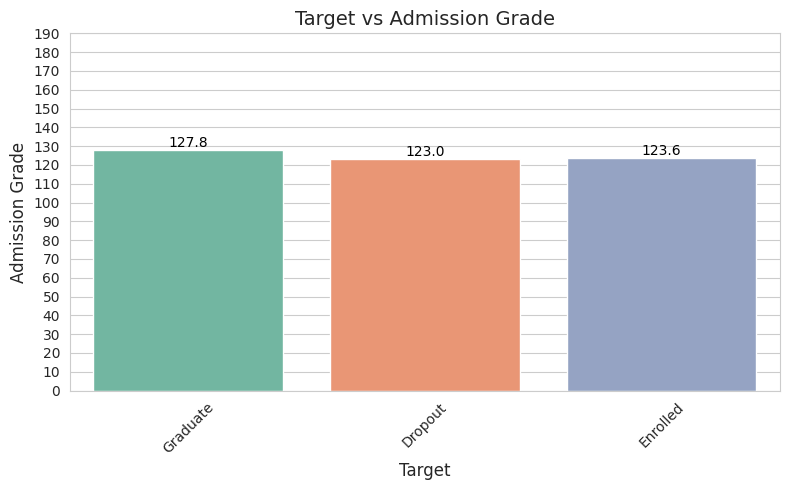

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and palette
sns.set_style('whitegrid')
sns.set_palette('Set2')

# Create the bar plot using seaborn
plt.figure(figsize=(8, 5))  # Adjust figure size for smaller plot
ax = sns.barplot(x='Target', y='Admission grade', data=df, ci=None)  # ci=None for no error bars

# Add annotations (optional)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Customize labels and title
plt.title('Target vs Admission Grade', fontsize=14)
plt.xlabel('Target', fontsize=12)
plt.ylabel('Admission Grade', fontsize=12)

# Rotate x-axis labels
plt.xticks(rotation=45)

# Adjust y-axis ticks
max_grade = int(df['Admission grade'].max())  # Convert maximum grade to integer
plt.yticks(range(0, max_grade + 10, 10))

# Adjust plot aesthetics
plt.tick_params(axis='both', which='major', labelsize=10)

# Show the plot
plt.tight_layout()
plt.show()


# Data Preprocessing

In [119]:

# Initialize LabelEncoder
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
df['Target'] = le.fit_transform(df['Target'])


In [120]:
# Checking the corelation between the columns
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                                      id  Marital status  \
id                                              1.000000        0.009796   
Marital status                                  0.009796        1.000000   
Application mode                               -0.003956        0.307324   
Application order                              -0.007129       -0.113951   
Course                                          0.002111        0.023141   
Daytime/evening attendance                      0.002192       -0.323587   
Previous qualification                         -0.005403        0.084064   
Previous qualification (grade)                 -0.003635       -0.037717   
Nacionality                                     0.002437        0.004660   
Mother's qualification                          0.001159        0.198373   
Father's qualification                         -0.003199        0.144820   
Mother's occupation                             0.007027        0.069695   
Father's occ

In [ ]:
# Create the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [122]:
#Target columns after encloding
df['Target']

0        2
1        0
2        0
3        1
4        2
        ..
76513    2
76514    2
76515    1
76516    0
76517    2
Name: Target, Length: 76518, dtype: int64

# Train Test Split
 

In [123]:
X=df.drop(['Target','id'], axis=1)
Y=df['Target']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

# MODELING

In [125]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve,auc

# **HyperParameter Tuneing**

In [126]:
lgbm_params = {
                 'objective': 'multiclass',
                 'data_sample_strategy': 'goss',
                 'tree_learner': 'feature', 
                 'n_estimators': 743, 
                 'learning_rate': 0.02636616162598401, 
                 'feature_fraction': 0.298183729482288,
                 'lambda_l1': 6.242410039948067e-07,
                 'lambda_l2': 0.4063299210212167, 
                 'num_leaves': 759, 
                 'max_depth': 50, 
                 
                 'colsample_bytree': 0.7975468653525116, 
                 'min_child_samples': 102, 
                 'min_sum_hessian_in_leaf': 5.440582524630883,
                 'min_gain_to_split': 0.7247318987185962, 
                 'max_bin': 156,
                 'top_rate': 0.6132659772851583,
                 'verbose': -1, 
                 'random_state': 42 
}

lgbm = LGBMClassifier(**lgbm_params)
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.90%


# **Accuracy**

In [129]:
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.90%


In [ ]:
df_test.drop(columns=['id'],inplace = True)

In [132]:
y_pred = lgbm.predict(df_test)


In [133]:
y_test=le.inverse_transform(y_pred)


# **Evaluation**

In [135]:
submission['Target']=y_test
submission.to_csv("submission.csv", index=False)
submission

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout


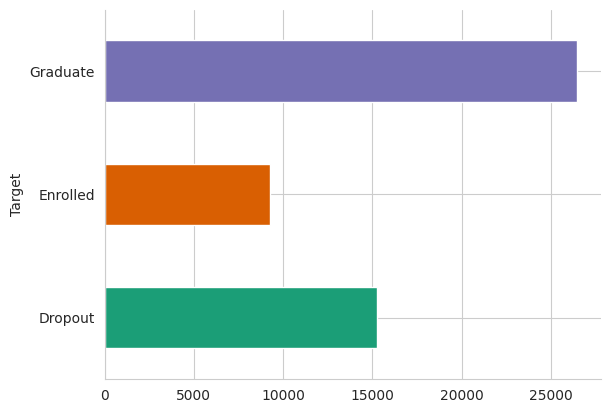

In [137]:
submission.groupby('Target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

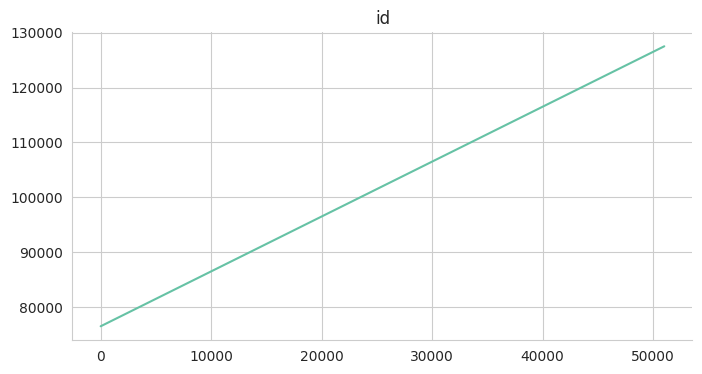

In [138]:
submission['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

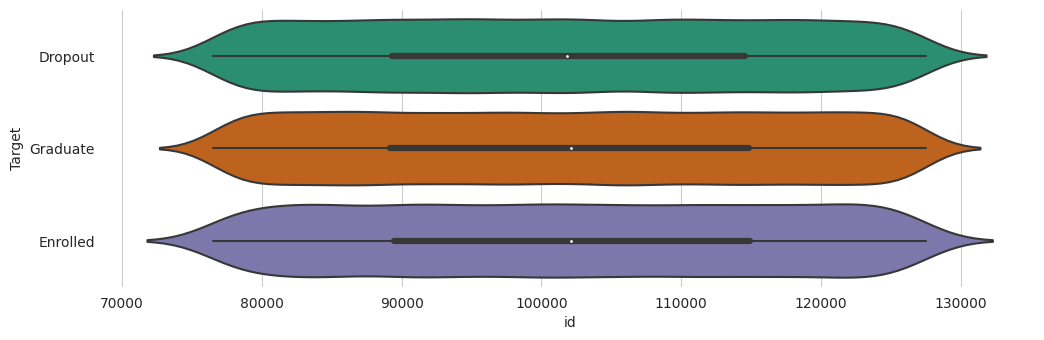

In [139]:
figsize = (12, 1.2 * len(submission['Target'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(submission, x='id', y='Target', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [140]:
pd.read_csv('submission.csv')

,id,Target
0,76518,Dropout
1,76519,Graduate
2,76520,Graduate
3,76521,Graduate
4,76522,Enrolled
...,...,...
51007,127525,Dropout
51008,127526,Dropout
51009,127527,Dropout
51010,127528,Dropout
